In [15]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

max_epoch_reached = 10
epoch = 10
comparative_live_loss = True
plot_live_training_loss = True
plot_live_time_loss = True
#dir = 
def comparitive_loss_plot(x_list, y_list, legend_label_list, x_label, y_label, title, save_path, plot_or_save):
    for x, y, legend_label in zip(x_list, y_list, legend_label_list):
        plt.plot(x, y, label=legend_label)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(alpha=0.2)
    plt.legend()
    plt.show()

In [16]:
comparative_loss_titles = ["10K 30s 100n", 
                           #"100K 30s 100n", 
                           #"500K 30s 100n"
                           ]
comparative_loss_paths = [r'N:\Yr 3 Project Results\RDT 10K 1000ToF timed - Training Results\\',
                          #r'N:\Yr 3 Project Results\RDT 100K 1000ToF timed - Training Results\\',
                          #r'N:\Yr 3 Project Results\RDT 500K 1000ToF timed - Training Results\\',
                          ] 

In [25]:
if comparative_live_loss:
    comparative_history_da = []
    comparative_epoch_times = []
    for loss_path in comparative_loss_paths:
        #load pkl file into dictionary
        if plot_live_training_loss or plot_live_time_loss:
            with open(loss_path + '\\Raw_Data_Output\\history_da_dict.pkl', 'rb') as f:
                comparative_history_da.append(pickle.load(f))
        if plot_live_time_loss:
            with open(loss_path + '\\Raw_Data_Output\\epoch_times_list_list.csv', 'rb') as f:
                # load the data from the csv file called f into a list 
                comparative_epoch_times.append(np.loadtxt(f, delimiter=',').tolist())


print("Loading data...")
for i in range(0, len(comparative_history_da)):
    print(len(comparative_history_da[i]['train_loss']))
    print(len(comparative_epoch_times[i]))

Loading data...


TypeError: 'int' object is not iterable

ValueError: x and y must have same first dimension, but have shapes (470,) and (469,)

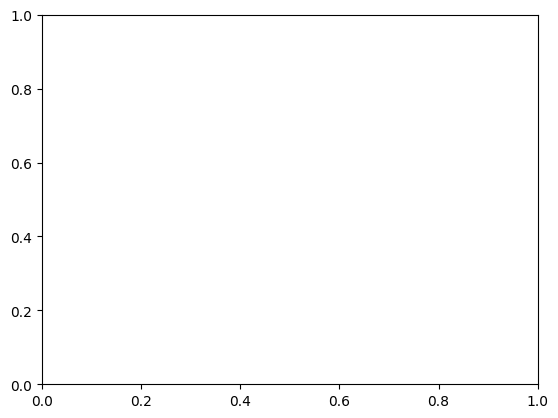

In [18]:

### Live Loss vs time plot
if plot_live_time_loss:
    Out_Label = "Tloss.png"
    
    x_list = []
    y_list = []
    legend_label_list = []

    if comparative_live_loss:
        legend_label_list.extend(comparative_loss_titles)
        
        for loss_dictionary in comparative_history_da:
            if epoch > len(loss_dictionary['train_loss']):
                loss_dictionary['train_loss'].append(np.nan) # protection from surpassing the comaprison data during training. 
            y_list.append(loss_dictionary['train_loss'])

        for epoch_t_list in comparative_epoch_times:
            if epoch > len(epoch_t_list):
                epoch_t_list.append(np.nan) # protection from surpassing the comaprison data during training.
            x_list.append(epoch_t_list)

    comparitive_loss_plot(x_list, y_list, legend_label_list, "Time (s)", "Train loss (ACB-MSE)", "Live Time loss", Out_Label, 1)


